In [28]:
import uhd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [29]:

usrp = uhd.usrp.MultiUSRP()

num_samps = 1000000 # number of samples received
center_freq = 2.45e9# Hz
sample_rate = 56e6 # Hz twice the BW
Fs = 60e6
gain = 0# dB
Threshhold = -60 #dB

usrp.set_rx_rate(sample_rate, 0)
usrp.set_rx_freq(uhd.libpyuhd.types.tune_request(center_freq), 0)
usrp.set_rx_gain(gain, 0)
usrp.set_rx_agc(False, 0)

In [30]:
batch = 1000
# Set up the stream and receive buffer
st_args = uhd.usrp.StreamArgs("fc32", "sc16")
st_args.channels = [0]
metadata = uhd.types.RXMetadata()
streamer = usrp.get_rx_stream(st_args)
recv_buffer = np.zeros((1, batch), dtype=np.complex64)

# Start Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.start_cont)
stream_cmd.stream_now = True
streamer.issue_stream_cmd(stream_cmd)

In [31]:
# Receive Samples
import numpy as np

f = open("RawIQ.iq","wb")
samples = np.zeros(batch, dtype=np.complex64)
for i in range(num_samps//batch):
    streamer.recv(recv_buffer, metadata)
    # for i in range(len(recv_buffer)):
    #     if abs(recv_buffer[0][i])< 10**(Threshhold/10):
    #         recv_buffer[0][i] = 0
    temp = []
    samples = recv_buffer[0]
    for i  in range(len(samples)):
        if abs(np.real(samples[i])) > 0.002 and abs(np.imag(samples[i])) > 0.002:
            temp.append(samples[i])
    np.array(temp).tofile(f)

# Stop Stream
stream_cmd = uhd.types.StreamCMD(uhd.types.StreamMode.stop_cont)
streamer.issue_stream_cmd(stream_cmd)

# we will only take the FFT of the first 1024 samples, see text below


DDOOOOOOOOOOOOOO

385


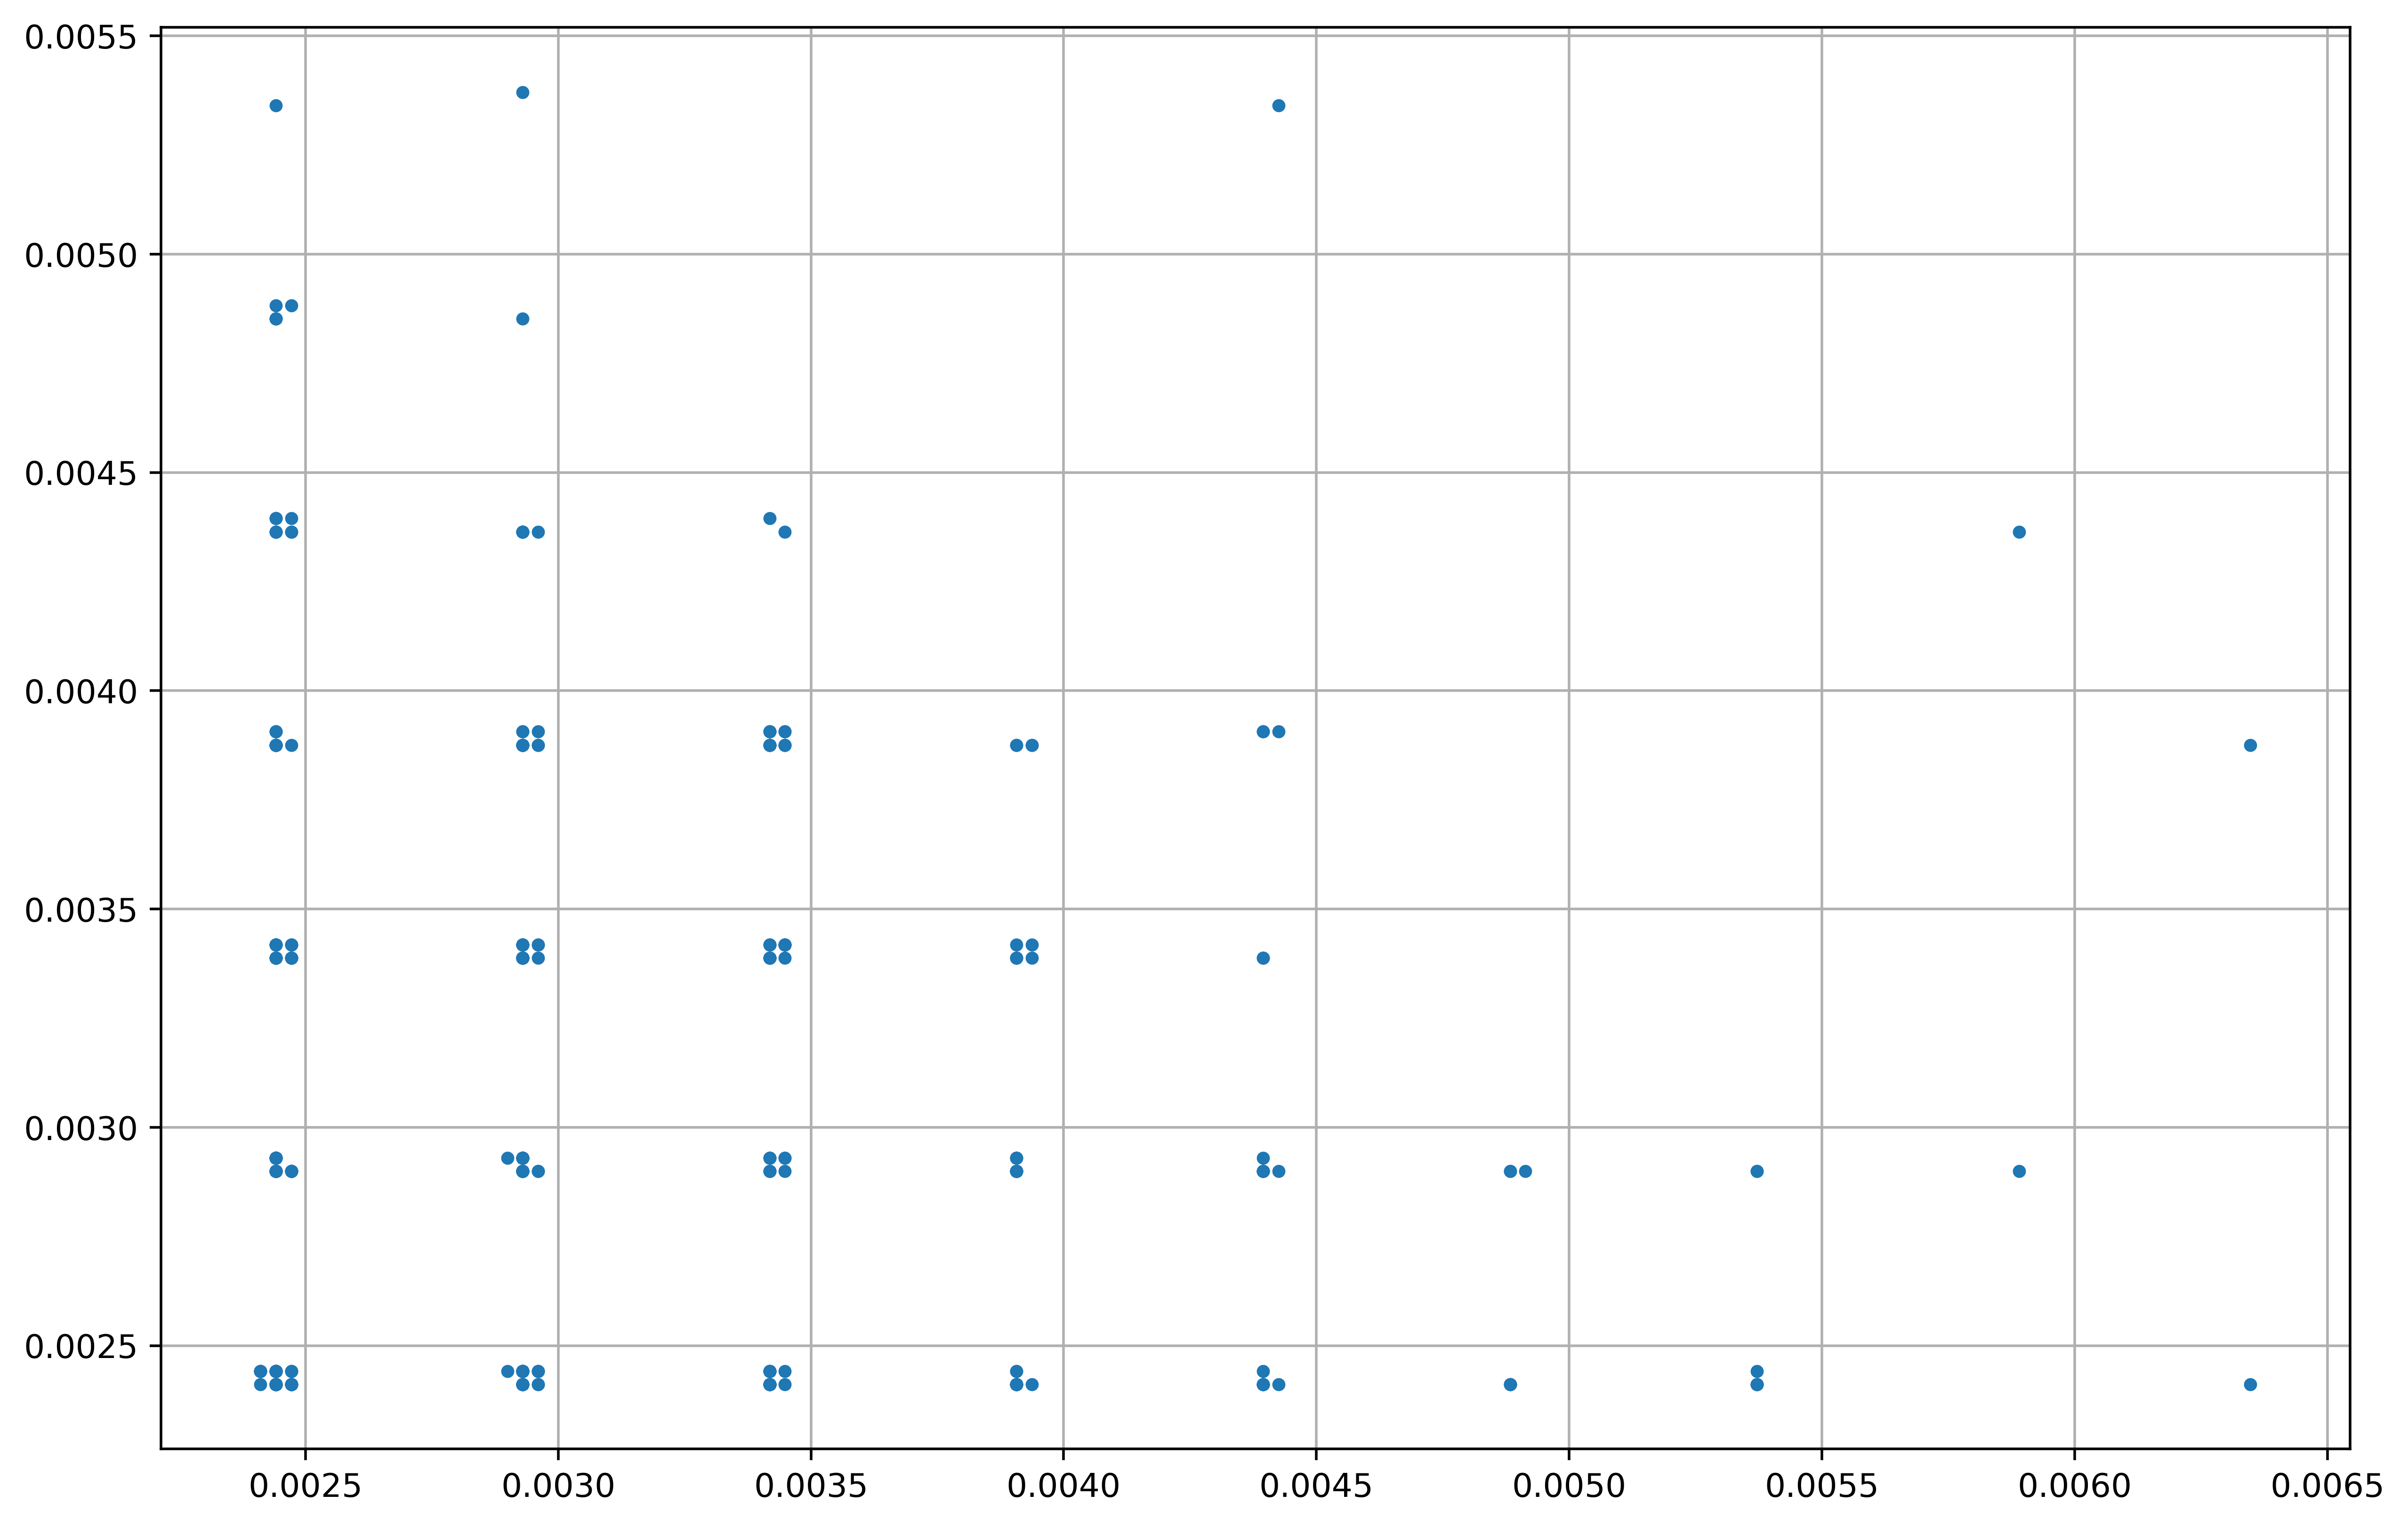

In [32]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.fromfile('RawIQ.iq', np.complex64) # Read in file.  We have to tell it what format it is
print(len(samples))
plt.figure(figsize=(12, 8), dpi=500)
# Plot constellation to make sure it looks right
plt.plot(np.real(samples), np.imag(samples), '.')
plt.grid(True)
plt.show()
